<h2>Restricted Boltzmann Machines</h2><h4>Introduction</h4><p>These are shallow neural nets which can learn to reconstruct data by themselves.More importantly, it can extract meaningful features from a given input.</p><h4>Working</h4><p>It is a two layer neural network which simply takes the input from the input layer or <strong>visible layer </strong>translate those into a set of binary values that represent them in the hidden layer.Then, these numbers can be translated back to reconstruct the inputs. Throgh several forward and backward passes, it will be trained which will reveal which features are the most important ones when ndetecting patterns.<h3>RBM is a generative model.</h3><strong>Discriminative:</strong>Consider a classification problem in which we want to learn to distinguish between Sedan cars (y = 1) and SUV cars (y = 0), based on some features of cars. Given a training set, an algorithm like logistic regression tries to find a straight line—that is, a decision boundary—that separates the suv and sedan.
<strong>Generative:</strong> looking at cars, we can build a model of what Sedan cars look like. Then, looking at SUVs, we can build a separate model of what SUV cars look like. Finally, to classify a new car, we can match the new car against the Sedan model, and match it against the SUV model, to see whether the new car looks more like the SUV or Sedan.

<h3>Initialization</h3>

In [21]:
import urllib.request
with urllib.request.urlopen("http://deeplearning.net/tutorial/code/utils.py") as url:
    response = url.read()
target = open('utils.py','w')
target.write(response.decode('utf-8'))
target.close()

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from PIL import Image
from utils import tile_raster_images
import matplotlib.pyplot as plt

In [23]:
v_bias = tf.placeholder("float", [7])
h_bias = tf.placeholder("float", [2])


We have to define weights among the input layer and hidden layer nodes. In the weight matrix, the number of rows are equal to the input nodes, and the number of columns are equal to the output nodes. Let <b>W</b> be the Tensor of 7x2 (7 - number of visible neurons, 2 - number of hidden neurons) that represents weights between neurons. 

In [24]:
W = tf.constant(np.random.normal(loc= 0.0,scale = 1.0,size = (7,2)).astype(np.float32))

<h3>How to inference?</h3><br>RBM has two phases:<br>1.Forward Pass<br>2.Backward Pass or Reconstruction<br><b>Phase 1) Forward pass:</b>  Input one training sample (one image) <b>X</b> through all visible nodes, and pass it to all hidden nodes. Processing happens in each node in the hidden layer. This computation begins by making stochastic decisions about whether to transmit that input or not (i.e. to determine the state of each hidden layer). At the hidden layer's nodes, <b>X</b> is multiplied by a <b>$W_{ij}$</b> and added to <b>h_bias</b>. The result of those two operations is fed into the sigmoid function, which produces the node’s output, $p({h_j})$, where j is the unit number. 


Toy example for one case out of all input. Assume that we have a trained RBM, and a very simple input vector such as [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], lets see what would be the output of forward pass:

In [25]:
sess = tf.Session()
X = tf.constant([[1.0,0.0,0.0,1.0,0.0,0.0,0.0]])
v_state = X
print("Input: ",sess.run(v_state))

Input:  [[1. 0. 0. 1. 0. 0. 0.]]


In [26]:
h_bias = tf.constant([0.1,0.1])
print("hb: ",sess.run(h_bias))
print("w: ",sess.run(W))

hb:  [0.1 0.1]
w:  [[-1.4801649  -0.6439616 ]
 [-1.6827744   2.0680113 ]
 [-0.28229222 -0.6963326 ]
 [-0.2878138   1.2556444 ]
 [ 0.16205972 -0.48044816]
 [-1.1834319   0.46347117]
 [-0.33099836  0.8417841 ]]


In [27]:
# Probabilities of turning the hidden units on:
h_prob = tf.nn.sigmoid(tf.matmul(v_state,W) + h_bias)
print("p(h|v): ",sess.run(h_prob))

p(h|v):  [[0.15869386 0.6707729 ]]


In [28]:
h_state = tf.nn.relu(tf.sign(h_prob-tf.random_uniform(tf.shape(h_prob))))
print("h0 states: ",sess.run(h_state))

h0 states:  [[0. 1.]]


<b>Phase 2) Backward Pass (Reconstruction):</b>
The RBM reconstructs data by making several forward and backward passes between the visible and hidden layers.

So, in the second phase (i.e. reconstruction phase), the samples from the hidden layer (i.e. h) play the role of input. That is, <b>h</b> becomes the input in the backward pass. The same weight matrix and visible layer biases are used to go through the sigmoid function. The produced output is a reconstruction which is an approximation of the original input.

In [29]:
vb = tf.constant([0.1,0.2,0.1,0.1,0.1,0.2,0.1])
print("b: ",sess.run(vb))

b:  [0.1 0.2 0.1 0.1 0.1 0.2 0.1]


In [32]:
v_prob = sess.run(tf.nn.sigmoid(tf.matmul(h_state,tf.transpose(W))+vb))
print("p(vi|h): ",v_prob)

p(vi|h):  [[0.3672665  0.90619284 0.35518318 0.79505086 0.4060188  0.66003966
  0.7194599 ]]


In [33]:
v_state = tf.nn.relu(tf.sign(v_prob - tf.random_uniform(tf.shape(v_prob))))
print ("v probability states: ", sess.run(v_state))

v probability states:  [[0. 1. 0. 1. 1. 0. 1.]]


RBM learns a probability distribution over the input, and then, after being trained, the RBM can generate new samples from the learned probability distribution.

In [37]:
inp = sess.run(X)
print(inp)
print(v_prob[0])
v_probability = 1

[[1. 0. 0. 1. 0. 0. 0.]]
[0.3672665  0.90619284 0.35518318 0.79505086 0.4060188  0.66003966
 0.7194599 ]


In [40]:
# zip iterste over two two lists at a time
for elm,p in zip(inp[0],v_prob[0]):
    if elm == 1:
        v_probability *= p
    else:
        v_probability *= (1-p)
#     print(elm,p)
v_probability

0.0010005631335328455

<h3>MNIST</h3>

In [41]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [42]:
trX[1].shape

(784,)

MNIST images have 784 pixels, so the visible layer must have 784 input nodes.  For our case, we'll use 50 nodes in the hidden layer, so i = 50.

In [43]:
vb = tf.placeholder("float", [784])
hb = tf.placeholder("float", [50])

In [45]:
#tensor W representing the weights betweeen the neurons
W = tf.placeholder("float", [784, 50])

In [46]:
v0_state = tf.placeholder("float", [None, 784])

<h5>Hidden layer

In [48]:
h0_prob = tf.nn.sigmoid(tf.matmul(v0_state, W) + hb)  
h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random_uniform(tf.shape(h0_prob)))) #sample_h_given_X

<h5>Reconstruction part

In [49]:
v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random_uniform(tf.shape(v1_prob))))

<h5>Error</h5>

In [50]:
err = tf.reduce_mean(tf.square(v0_state - v1_state))

<h3>Training of the model</h3> We want to give a high probability to the input data we train on. So, in order to train an RBM, we have to maximize the product of probabilities assigned to all rows v (images) in the training set V (a matrix, where each row of it is treated as a visible vector v).So, we have to update the weights wij  to increase p(v) for all v in our training data during training. So we have to calculate the derivative.This cannot be easily done by typical <b>gradient descent (SGD)</b>, so we can use another approach, which has 2 steps:
<ol>
    <li>Gibbs Sampling</li>
    <li>Contrastive Divergence</li>
</ol>    
    
<h3>Gibbs Sampling</h3>First, given an input vector v we are using p(h|v) for prediction of the hidden values h. Then, knowing the hidden values, we use p(v|h) for reconstructing of new input values v.This process is repeated k times. After k iterations we obtain an other input vector vk which was recreated from original input values v0 or X.<h3>contrastive divergence (CD-k)</h3>
The update of the weight matrix is done during the Contrastive Divergence step. 

Vectors v0 and vk are used to calculate the activation probabilities for hidden values h0 and hk. The difference between the outer products of those probabilities with input vectors v0 and vk results in the update matrix.Contrastive Divergence is actually matrix of values that is computed and used to adjust values of the W matrix. Changing W incrementally leads to training of W values. Then on each step (epoch), W is updated to a new value W'
 

In [51]:
h1_prob = tf.nn.sigmoid(tf.matmul(v1_state, W) + hb)
h1_state = tf.nn.relu(tf.sign(h1_prob - tf.random_uniform(tf.shape(h1_prob))))

In [52]:
alpha = 0.01
W_Delta = tf.matmul(tf.transpose(v0_state), h0_prob) - tf.matmul(tf.transpose(v1_state), h1_prob)
update_w = W + alpha * W_Delta
update_vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
update_hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0)

In [53]:
cur_w = np.zeros([784, 50], np.float32)
cur_vb = np.zeros([784], np.float32)
cur_hb = np.zeros([50], np.float32)
prv_w = np.zeros([784, 50], np.float32)
prv_vb = np.zeros([784], np.float32)
prv_hb = np.zeros([50], np.float32)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [54]:
sess.run(err, feed_dict={v0_state: trX, W: prv_w, vb: prv_vb, hb: prv_hb})

0.48158446

Epoch: 0 reconstruction error: 0.096556
Epoch: 1 reconstruction error: 0.095238
Epoch: 2 reconstruction error: 0.091921
Epoch: 3 reconstruction error: 0.089966
Epoch: 4 reconstruction error: 0.089516


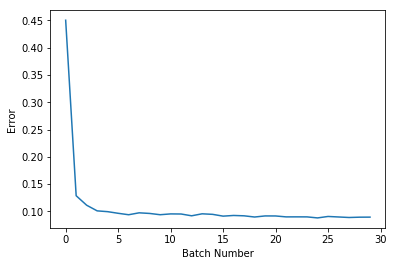

In [56]:
epochs = 5
batchsize = 100
weights = []
errors = []
for epoch in range(epochs):
    for start, end in zip( range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={ v0_state: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0_state: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={ v0_state: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb
        if start % 10000 == 0:
            errors.append(sess.run(err, feed_dict={v0_state: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
            weights.append(cur_w)
    print ('Epoch: %d' % epoch,'reconstruction error: %f' % errors[-1])
plt.plot(errors)
plt.xlabel("Batch Number")
plt.ylabel("Error")
plt.show()
        

In [60]:
uw = weights[-1]
print (uw)

[[-0.4121542  -2.6137764  -0.2851406  ... -0.28041148 -0.35820255
  -2.2996387 ]
 [-0.43194845 -2.3272426  -0.29367158 ... -0.28540233 -0.4031598
  -2.3508468 ]
 [-0.42983383 -2.4868097  -0.21173202 ... -0.2328388  -0.30390576
  -2.2377357 ]
 ...
 [-0.3879317  -2.4590557  -0.27051672 ... -0.2670327  -0.3315405
  -2.2725456 ]
 [-0.43555576 -2.5485737  -0.26061985 ... -0.25000495 -0.42487556
  -2.3573558 ]
 [-0.48566836 -2.4762688  -0.2980275  ... -0.3010182  -0.37014133
  -2.186695  ]]


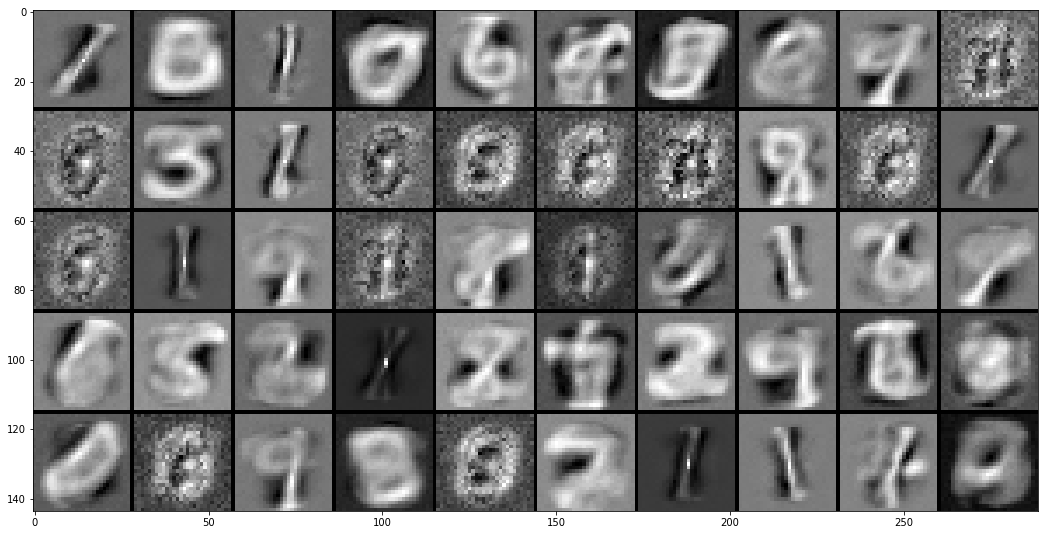

In [66]:
tile_raster_images(X=cur_w.T, img_shape=(28, 28), tile_shape=(5, 10), tile_spacing=(1, 1))
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
image = Image.fromarray(tile_raster_images(X=cur_w.T, img_shape=(28, 28) ,tile_shape=(5, 10), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

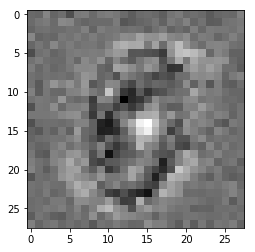

In [76]:
from PIL import Image
image = Image.fromarray(tile_raster_images(X =cur_w.T[10:11], img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
### Plot image
plt.rcParams['figure.figsize'] = (4.0, 4.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')  

<h3>Example</h3> Imagine that we have a destructed image of figure 3. Lets see if our trained network can fix it.

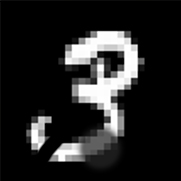

In [75]:
img = Image.open('destructed3.jpg')
img

Now let's pass this image through the net.

In [78]:
# convert the image to a 1d numpy array
sample_case = np.array(img.convert('I').resize((28,28))).ravel().reshape((1, -1))/255.0
sample_case

array([[0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

Feed the sample case into the network and reconstruct the output

In [81]:
hh0_p = tf.nn.sigmoid(tf.matmul(v0_state, W) + hb)
hh0_s = tf.nn.relu(tf.sign(hh0_p - tf.random_uniform(tf.shape(hh0_p)))) 
# hh0_s = tf.round(hh0_p)
hh0_p_val,hh0_s_val  = sess.run((hh0_p, hh0_s), feed_dict={ v0_state: sample_case, W: prv_w, hb: prv_hb})
print("Probability nodes in hidden layer:" ,hh0_p_val)
print("activated nodes in hidden layer:" ,hh0_s_val)


vv1_p = tf.nn.sigmoid(tf.matmul(hh0_s_val, tf.transpose(W)) + vb)
rec_prob = sess.run(vv1_p, feed_dict={ hh0_s: hh0_s_val, W: prv_w, vb: prv_vb})

Probability nodes in hidden layer: [[0.00000000e+00 1.20083973e-06 5.66846214e-09 1.29133673e-08
  0.00000000e+00 3.10465951e-15 9.99664783e-01 1.00000000e+00
  1.19378973e-20 9.74468076e-12 4.48941069e-13 9.94957149e-01
  1.49926260e-20 1.69239655e-12 3.05404146e-09 3.00240471e-10
  5.47321867e-12 1.25834282e-11 5.33636850e-11 4.98527117e-29
  1.49067669e-09 3.94639970e-28 6.94028033e-14 7.01749880e-10
  3.51771841e-11 6.10571669e-06 9.53902900e-01 1.07299729e-18
  6.03805538e-27 4.25163432e-23 7.52362450e-10 4.44296899e-20
  9.02676229e-18 9.03267335e-21 2.57748063e-03 2.67109045e-15
  1.00000000e+00 0.00000000e+00 1.03912496e-24 9.99997377e-01
  5.73220241e-18 1.90188643e-09 7.04695239e-29 1.05819084e-01
  1.21651100e-09 6.69693132e-15 1.28024803e-25 1.65212265e-28
  1.13909672e-19 1.18302749e-20]]
activated nodes in hidden layer: [[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0

<h3>Plotting

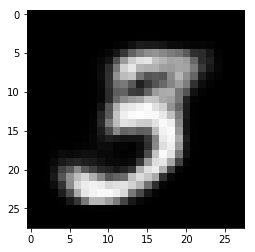

In [83]:
img = Image.fromarray(tile_raster_images(X=rec_prob, img_shape=(28, 28),tile_shape=(1, 1), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (4.0, 4.0)
imgplot = plt.imshow(img)
imgplot.set_cmap('gray') 

<h5>This is all about RBM</h5>

<h3>Application of RBM</h3><br>RBM is useful for Collaborative Filtering, dimensionality reduction, classification, regression, feature learning, topic modeling and even Deep Belief Networks.